In [2]:
import re
import pandas as pd
from transformers import pipeline
import sentencepiece
import transformers
import matplotlib.pyplot as plt

In [45]:
sentiment_model = pipeline(
    "sentiment-analysis",
    model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa",
    tokenizer="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
)

Downloading: 100%|██████████| 899/899 [00:00<00:00, 894kB/s]
Downloading: 100%|██████████| 422M/422M [00:28<00:00, 15.3MB/s]    
Downloading: 100%|██████████| 387/387 [00:00<00:00, 389kB/s]
Downloading: 100%|██████████| 224k/224k [00:00<00:00, 230kB/s]  
Downloading: 100%|██████████| 465k/465k [00:01<00:00, 385kB/s]  
Downloading: 100%|██████████| 112/112 [00:00<00:00, 115kB/s]


In [47]:
# def get_sentiment(text):
#     prediction = sentiment_model(text)[0]
#     if prediction["label"] == "positive":
#         return 1.0
#     elif prediction["label"] == "neutral":
#         return 0.0
#     else:
#         return -1.0
    
def get_sentiment(text):
    prediction = sentiment_model(text)[0]['label']
    return prediction

In [48]:
df = pd.read_excel("../preprocess_review/output/preprocess_sentiment/uss_preprocess_sentiment.xlsx")
df.drop(['user','page_url','date_scraped','attraction'], axis=1, inplace=True)
df.head()

,date,rating,review,source
0,2020,10,universal studio singapore yang berada di pula...,tripadvisor
1,2019,10,cukup beruntung hanya membeli tiket biasa dapa...,tripadvisor
2,2019,10,tempat liburan keluarga yang sangat menarik un...,tripadvisor
3,2020,10,beli tiketnya via ota dan kebetulan sudah prin...,tripadvisor
4,2020,10,jalan jalan bareng si kecil emang menyenangkan...,tripadvisor


In [49]:
with open('../resources/combined_stop_words.txt') as f:
    stopwords = [line.rstrip() for line in f]

In [50]:
df = df[df['review'].notna()]

In [54]:
df['sentiment'] = df['review'].apply(lambda x: get_sentiment(x))
df = df[['date','review','source','rating','sentiment']]

In [55]:
df.to_excel("ussreview_sentiment.xlsx", index=False)

In [80]:
df2 = df.groupby(['date', 'rating','sentiment'])['review'].count()

In [81]:
df_count = pd.DataFrame(df2)

In [91]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [92]:
df_count

review
date rating sentiment        
2014 6      Negative        1
     10     Positive        1
2015 8      Positive        2
     10     Negative        2
            Neutral         1
            Positive        1
2016 8      Negative        1
            Neutral         1
            Positive        3
     10     Negative        1
            Neutral         1
            Positive        9
2017 6      Negative        2
            Neutral         1
            Positive        1
     8      Negative        7
            Neutral        10
            Positive       69
     10     Negative        7
            Neutral        14
            Positive      136
2018 2      Negative        1
     4      Neutral         1
     6      Negative        1
            Neutral         2
            Positive        5
     8      Negative       11
            Neutral         8
            Positive       34
     10     Negative       13
            Neutral        27
            Positive      173
2019 2      Positive        1
     4      Negative        3
            Neutral         1
     5      Negative       10
            Positive        1
     6      Negative       36
            Neutral        12
            Positive       26
     8      Negative       51
            Neutral        67
            Positive      334
     9      Negative       11
            Neutral        32
            Positive      218
     10     Negative       59
            Neutral       119
            Positive      655
2020 2      Neutral         1
     4      Negative        3
            Neutral         1
            Positive        2
     5      Negative        2
            Positive        1
     6      Negative       12
            Neutral         5
            Positive        8
     8      Negative       34
            Neutral        27
            Positive      118
     9      Negative        2
            Neutral        19
            Positive       49
     10     Negative       53
            Neutral        76
            Positive      455
2021 6      Positive        1
     8      Neutral         2
            Positive        2
     10     Negative        3
            Neutral         6
            Positive       41
2022 10     Positive        8

In [3]:
# TODO: Add visualisation

df = pd.read_excel("ussreview_sentiment.xlsx")
df

,date,review,source,rating,sentiment
0,2020,universal studio singapore yang berada di pula...,tripadvisor,10,Neutral
1,2019,cukup beruntung hanya membeli tiket biasa dapa...,tripadvisor,10,Neutral
2,2019,tempat liburan keluarga yang sangat menarik un...,tripadvisor,10,Positive
3,2020,beli tiketnya via ota dan kebetulan sudah prin...,tripadvisor,10,Positive
4,2020,jalan jalan bareng si kecil emang menyenangkan...,tripadvisor,10,Positive
...,...,...,...,...,...
3109,2020,sukses selalu singapura,google_reviews,10,Positive
3110,2020,tempat e asyik,google_reviews,10,Positive
3111,2016,keren bgt♥q sdh pernh dtng ke sana,google_reviews,8,Positive
3112,2019,bagus,google_reviews,10,Positive


In [23]:
df3 = df.groupby(['sentiment'])['review'].count()
df3

sentiment
Negative     326
Neutral      434
Positive    2354
Name: review, dtype: int64

<AxesSubplot:ylabel='review'>

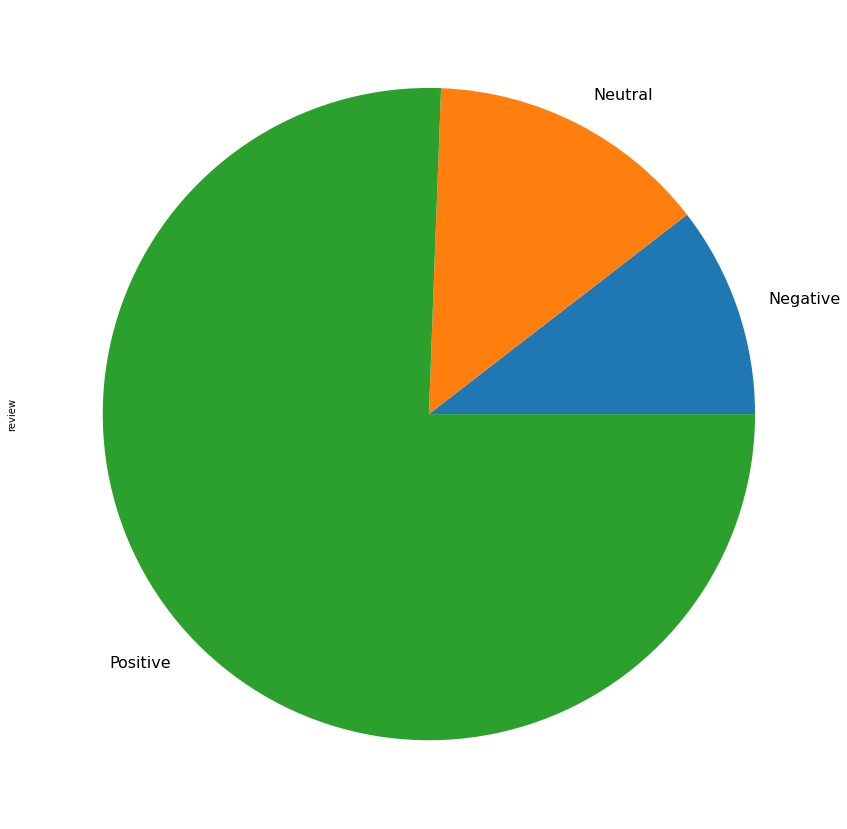

In [66]:
sentiment_share_overall = df3.plot.pie(y='sentiment', figsize=(15, 15), fontsize=16)
sentiment_share_overall

<AxesSubplot:title={'center':'Ratings vs. Sentiment'}, xlabel='Ratings', ylabel='No. of Reviews'>

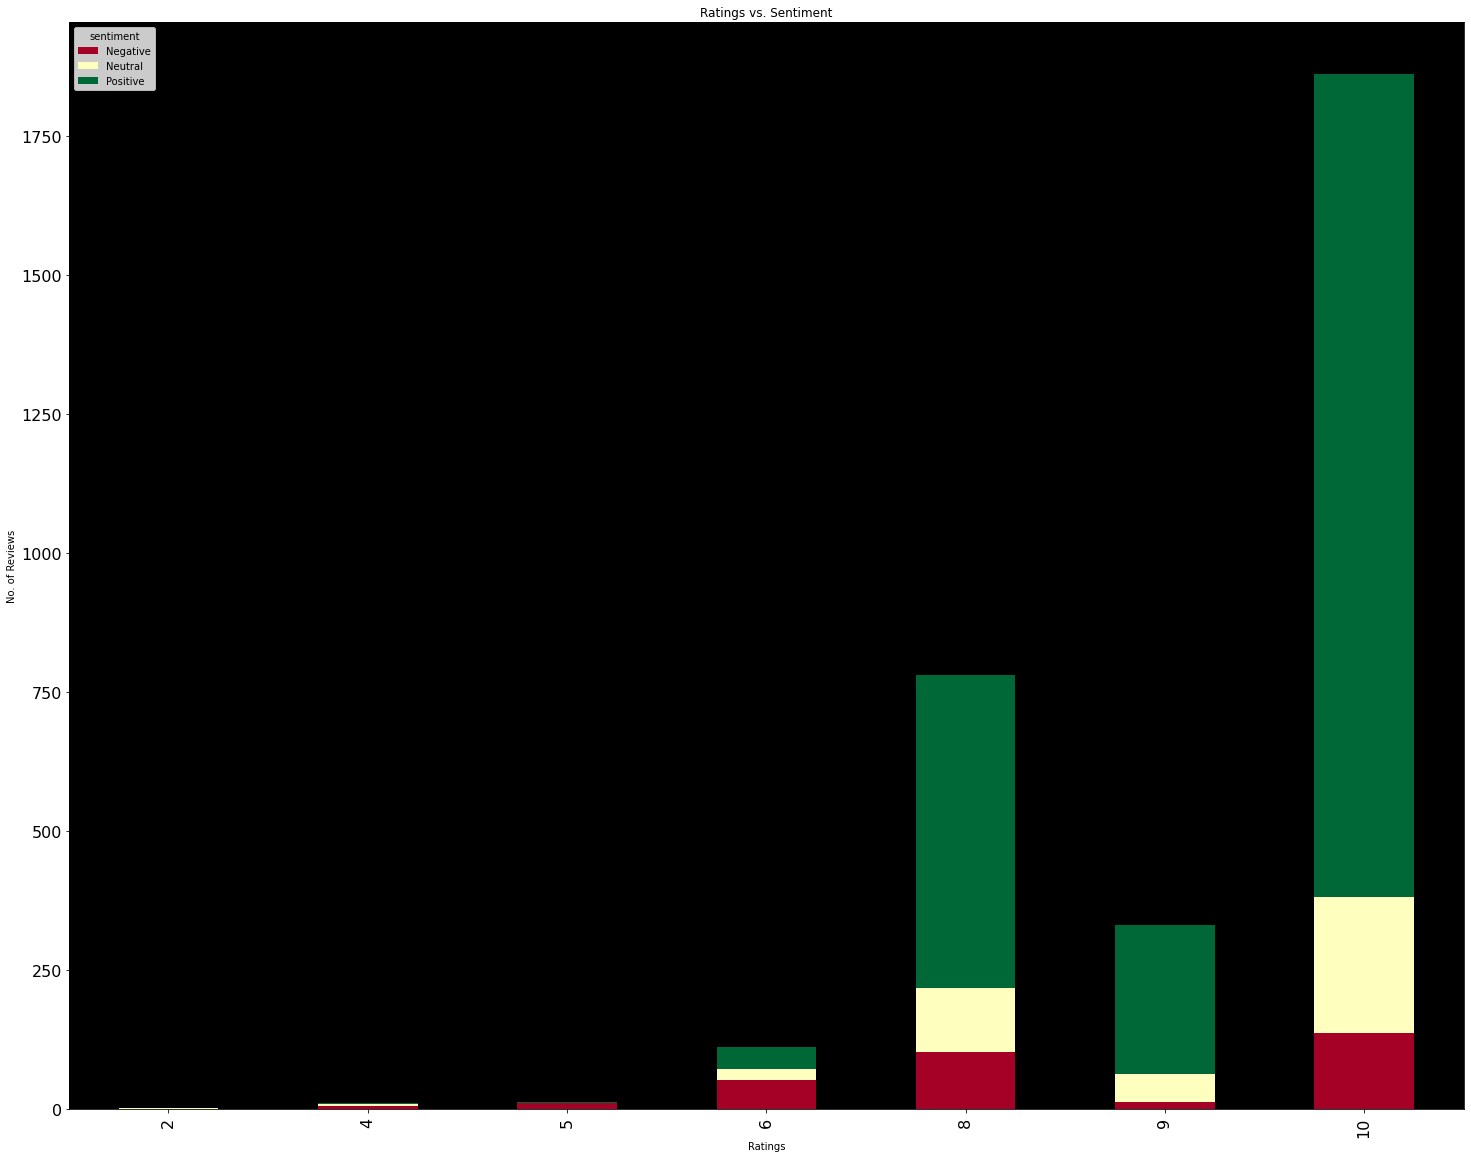

In [60]:
df2 = df.groupby(['rating','sentiment'])['review'].size().unstack().plot(
  fontsize=16,
  kind='bar', 
  stacked=True, 
  figsize=(25, 20), 
  title="Ratings vs. Sentiment", 
  xlabel="Ratings", 
  ylabel="No. of Reviews",
  colormap="RdYlGn",
  )
df2.set_facecolor("black")
df2

In [5]:
# TODO: Wordcloud + top words by sentiment + top words by 1,2,3,4 | 5,6,7 | 8,9,10

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
text = df["review"].to_string(index=False)
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 158813 words in the combination of all tweets.


In [6]:
%pip install nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Windows\\System32\\hf\\Lib\\site-packages\\nltk'
Check the permissions.



In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def show_wordcloud(data, title = None):
  
    # Using custom set of Bahasa Indonesia stopwords
    with open('../resources/combined_stop_words.txt') as f:
        stopwords = [x.rstrip() for x in f] 

    wordcloud = WordCloud(
        width=1600, 
        height=800,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luqman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


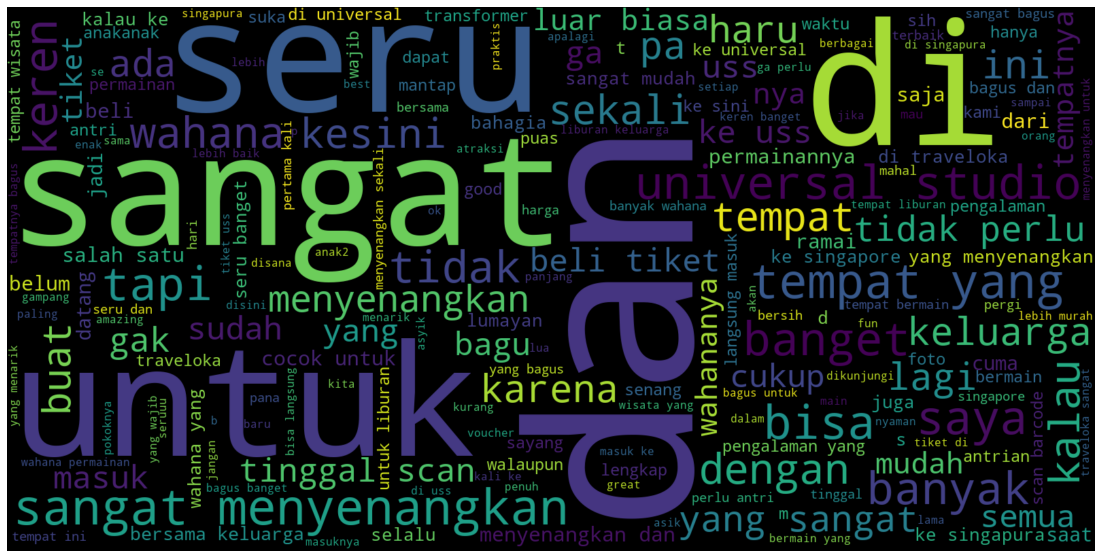

In [14]:


wordcloud = WordCloud(width=1600, height=800).generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

plt.show()

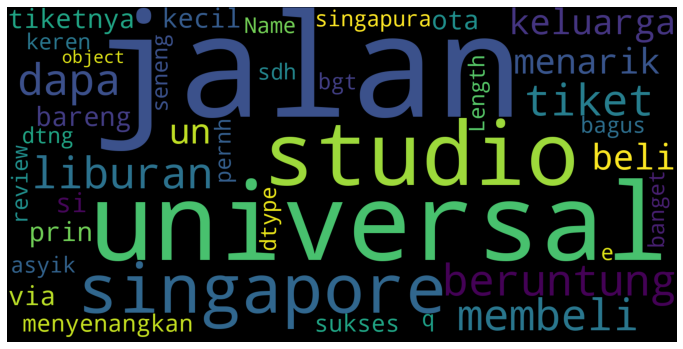

In [25]:
show_wordcloud(df['review'])

In [33]:
with open('../resources/combined_stop_words.txt') as f:
    stopwords = [x.rstrip() for x in f] # remove line breaks